# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [8]:
# Carregando a base
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# Dropando os nulos e padronizando
df = peng.select_dtypes('number').dropna()
df_pad = StandardScaler().fit_transform(df)

In [10]:
clus = AgglomerativeClustering(linkage="complete", 
                               distance_threshold = None, 
                               n_clusters=3)
clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
df['grupo'] = clus.labels_
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [12]:
peng = peng.merge(df['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


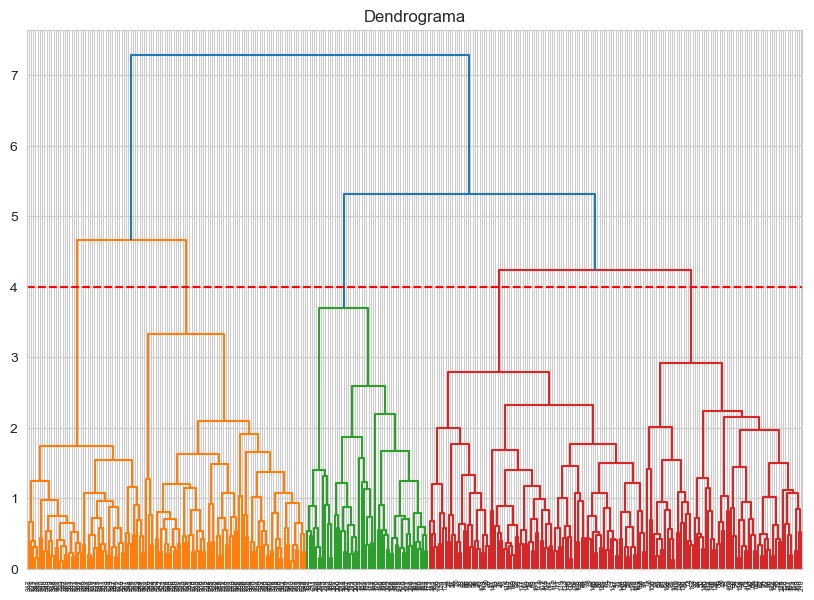

In [13]:
# Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [14]:
# Pinguis por grupo
peng.groupby('grupo')['species'].value_counts()

grupo  species  
0.0    Gentoo       123
1.0    Adelie       151
       Chinstrap     14
2.0    Chinstrap     54
Name: species, dtype: int64

In [15]:
# Descrição das variáveis
peng.groupby('grupo').describe()

bill_length_mm                                                        \
               count       mean       std   min   25%    50%     75%   max   
grupo                                                                        
0.0            123.0  47.504878  3.081857  40.9  45.3  47.30  49.550  59.6   
1.0            165.0  39.283030  3.072471  32.1  37.0  39.10  41.100  47.6   
2.0             54.0  49.935185  2.659916  45.2  48.2  50.25  51.375  58.0   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
grupo                           ...                                        
0.0           123.0  14.982114  ...             221.0  231.0       123.0   
1.0           165.0  18.304242  ...             195.0  210.0       165.0   
2.0            54.0  18.568519  ...             201.0  212.0        54.0   

                                                                         
              mean         std     min      25%     50%     75%     max  
grupo                                                                    
0.0    5076.016260  504.116237  3950.0  4700.00  5000.0  5500.0  6300.0  
1.0    3688.181818  449.767586  2850.0  3350.00  3650.0  3950.0  4775.0  
2.0    3779.629630  387.848263  2700.0  3556.25  3737.5  4037.5  4800.0  

[3 rows x 32 columns]

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [16]:
# Pelo Dendrograma, 5 grupos
clus = AgglomerativeClustering(linkage="complete", 
                               distance_threshold = None, 
                               n_clusters=5)
clus.fit(df_pad)

df['grupo_5'] = clus.labels_
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,grupo_5
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,4
1,39.5,17.4,186.0,3800.0,1,4
2,40.3,18.0,195.0,3250.0,1,4
4,36.7,19.3,193.0,3450.0,1,4
5,39.3,20.6,190.0,3650.0,1,2


In [18]:
peng = peng.merge(df['grupo_5'], how='left', on='id')

In [19]:
# Pinguis por grupo
peng.groupby('grupo_5')['species'].value_counts()

grupo_5  species  
0.0      Chinstrap    54
1.0      Gentoo       71
2.0      Adelie       60
         Chinstrap     9
3.0      Gentoo       52
4.0      Adelie       91
         Chinstrap     5
Name: species, dtype: int64

In [21]:
# Pinguis por grupo e sexo
peng.groupby('grupo_5')[['species', 'sex']].value_counts()

grupo_5  species    sex   
0.0      Chinstrap  Male      34
                    Female    20
1.0      Gentoo     Male      61
                    Female     9
2.0      Adelie     Male      55
         Chinstrap  Female     9
         Adelie     Female     4
3.0      Gentoo     Female    49
4.0      Adelie     Female    69
                    Male      18
         Chinstrap  Female     5
dtype: int64

In [22]:
# Descrição das variáveis
peng.groupby('grupo_5').describe()

bill_length_mm                                                    \
                 count       mean       std   min     25%    50%     75%   
grupo_5                                                                    
0.0               54.0  49.935185  2.659916  45.2  48.200  50.25  51.375   
1.0               71.0  49.192958  2.679303  44.4  47.400  49.20  50.450   
2.0               69.0  41.128986  3.048872  34.6  39.200  41.10  42.900   
3.0               52.0  45.200000  1.866422  40.9  43.575  45.30  46.500   
4.0               96.0  37.956250  2.321425  32.1  36.200  37.80  39.600   

              bill_depth_mm             ... body_mass_g         grupo       \
          max         count       mean  ...         75%     max count mean   
grupo_5                                 ...                                  
0.0      58.0          54.0  18.568519  ...      4037.5  4800.0  54.0  2.0   
1.0      59.6          71.0  15.625352  ...      5650.0  6300.0  71.0  0.0   
2.0      47.6          69.0  19.204348  ...      4300.0  4775.0  69.0  1.0   
3.0      49.1          52.0  14.103846  ...      4812.5  5200.0  52.0  0.0   
4.0      43.2          96.0  17.657292  ...      3600.0  4100.0  96.0  1.0   

                                       
         std  min  25%  50%  75%  max  
grupo_5                                
0.0      0.0  2.0  2.0  2.0  2.0  2.0  
1.0      0.0  0.0  0.0  0.0  0.0  0.0  
2.0      0.0  1.0  1.0  1.0  1.0  1.0  
3.0      0.0  0.0  0.0  0.0  0.0  0.0  
4.0      0.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 40 columns]

In [24]:
# Descrição das variáveis por sexo
peng.groupby(['grupo_5', 'sex']).describe()

bill_length_mm                                           \
                        count       mean       std   min    25%    50%   
grupo_5 sex                                                              
0.0     Female           20.0  47.965000  2.999171  45.2  46.05  46.85   
        Male             34.0  51.094118  1.564558  48.5  50.05  50.95   
1.0     Female            9.0  47.811111  1.341123  46.4  46.90  47.50   
        Male             61.0  49.473770  2.720594  44.4  48.10  49.50   
2.0     Female           13.0  43.092308  4.515614  35.3  39.60  45.40   
        Male             55.0  40.649091  2.449026  34.6  39.20  40.80   
3.0     Female           49.0  45.151020  1.891001  40.9  43.50  45.30   
4.0     Female           74.0  37.618919  2.356087  32.1  36.00  37.45   
        Male             18.0  39.600000  1.425400  37.2  38.35  40.10   

                             bill_depth_mm             ... body_mass_g  \
                   75%   max         count       mean  ...         75%   
grupo_5 sex                                            ...               
0.0     Female  49.875  58.0          20.0  17.405000  ...      3675.0   
        Male    51.975  55.8          34.0  19.252941  ...      4100.0   
1.0     Female  48.500  50.5           9.0  14.988889  ...      5000.0   
        Male    50.500  59.6          61.0  15.718033  ...      5700.0   
2.0     Female  46.400  47.6          13.0  18.692308  ...      3850.0   
        Male    42.150  46.0          55.0  19.307273  ...      4375.0   
3.0     Female  46.500  49.1          49.0  14.100000  ...      4850.0   
4.0     Female  39.000  43.2          74.0  17.477027  ...      3537.5   
        Male    40.850  41.1          18.0  18.355556  ...      3900.0   

                       grupo                                     
                   max count mean  std  min  25%  50%  75%  max  
grupo_5 sex                                                      
0.0     Female  3900.0  20.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
        Male    4800.0  34.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1.0     Female  5200.0   9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        Male    6300.0  61.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2.0     Female  4150.0  13.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
        Male    4775.0  55.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
3.0     Female  5200.0  49.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4.0     Female  3825.0  74.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
        Male    4100.0  18.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[9 rows x 40 columns]

grupo_5    0.0  1.0  2.0  3.0  4.0
species                           
Adelie       0    0   60    0   91
Chinstrap   54    0    9    0    5
Gentoo       0   71    0   52    0


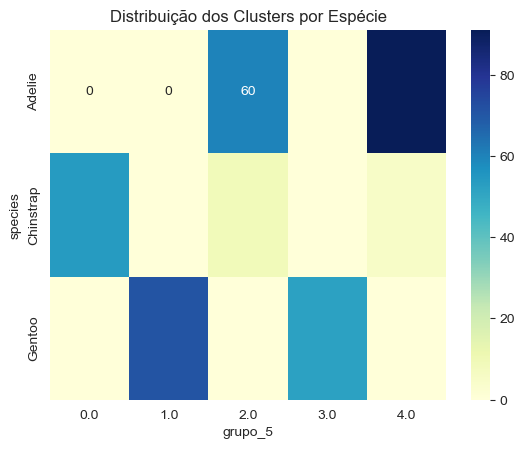

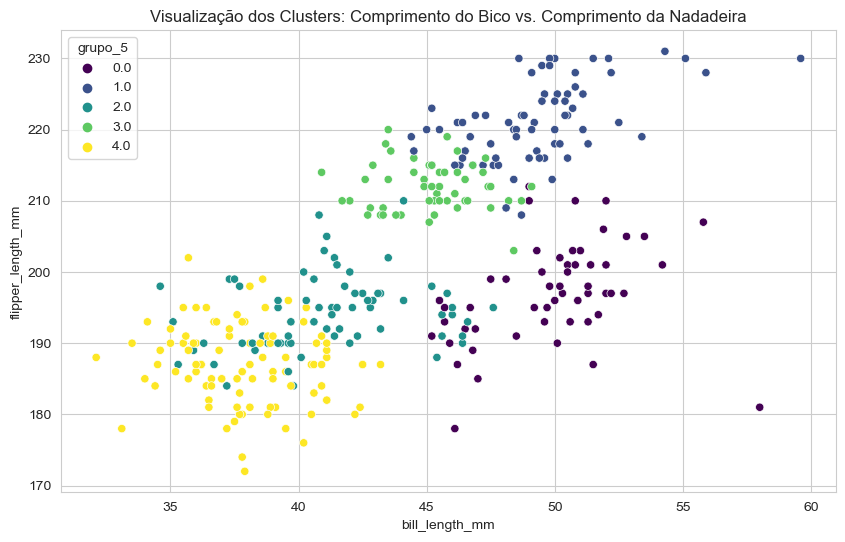

In [42]:
# Análise da distribuição dos clusters por espécie e ilha
species_cluster_distribution = pd.crosstab(peng['species'], peng['grupo_5'])

print(species_cluster_distribution)

# Visualizando a distribuição dos clusters por espécie
species_plot = sns.heatmap(species_cluster_distribution, annot=True, fmt='d', cmap='YlGnBu')
species_plot.set_title("Distribuição dos Clusters por Espécie")
plt.show()

# Selecionando duas características físicas para a visualização dos clusters
# Aqui, escolherei 'bill_length_mm' e 'flipper_length_mm' para a visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(data=peng.drop(columns='grupo'), x='bill_length_mm', y='flipper_length_mm', hue='grupo_5', palette='viridis')
plt.title('Visualização dos Clusters: Comprimento do Bico vs. Comprimento da Nadadeira')
plt.show()

### Conclusões

1. **Distribuição dos Clusters por Espécie**: Cada espécie de pinguim parece ser predominantemente agrupada em clusters específicos, indicando que as características físicas usadas para o clustering são distintivas entre as espécies.

2. **Visualização dos Clusters**: Comprimento do Bico vs. Comprimento da Nadadeira: A visualização do comprimento do bico contra o comprimento da nadadeira mostra uma separação entre os clusters, apesar de alguma sopreposição.